**Experiment#1**

1.   Use of MinMax to all the data except target variable
2.   Get table to describe all about dataset as min, max, mean, sd, etc.
3.   Change the columns name as mentioned in Paper writing
4.   Graphical representation of data with Histogram or density/kernel density plot
5.   Heatmap or scatter/Q-Q plot for each feature in the dataset
6.   Dataset splitting
7.   Selected ML classifiers on the training and testing datasets ANN, SVM, Gradientboost
8.   Validation Metrics: Accuracy, F1_score, Recall, Percission, MCC
9- Lasso Feature selection



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('darkgrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df1 = df.copy()

In [ ]:
new_columns = ['Age','Sex','CP','ResBP','SC','FastBS','RestECG','MaxHR','ExeIA','OldPST','SlopePE','MajorVC','TS','L']

df1.columns = new_columns
df1.head()

,Age,Sex,CP,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,SlopePE,MajorVC,TS,L
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1.describe()

,Age,Sex,CP,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,SlopePE,MajorVC,TS,L
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**One-hot Encoding to categorical variables.**

In [ ]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df1['CP'], prefix='CP')
thal = pd.get_dummies(df1['TS'], prefix='TS')
slope = pd.get_dummies(df1['SlopePE'], prefix='SlopePE')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df1, cp, thal, slope]
df1 = pd.concat(frames, axis = 1)

In [ ]:
# --- Drop Unnecessary Variables ---
df1 = df1.drop(columns = ['CP', 'TS', 'SlopePE'])

In [ ]:
df1.head()

,Age,Sex,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,MajorVC,...,CP_1,CP_2,CP_3,TS_0,TS_1,TS_2,TS_3,SlopePE_0,SlopePE_1,SlopePE_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


**LASSO Feature Selection Method**

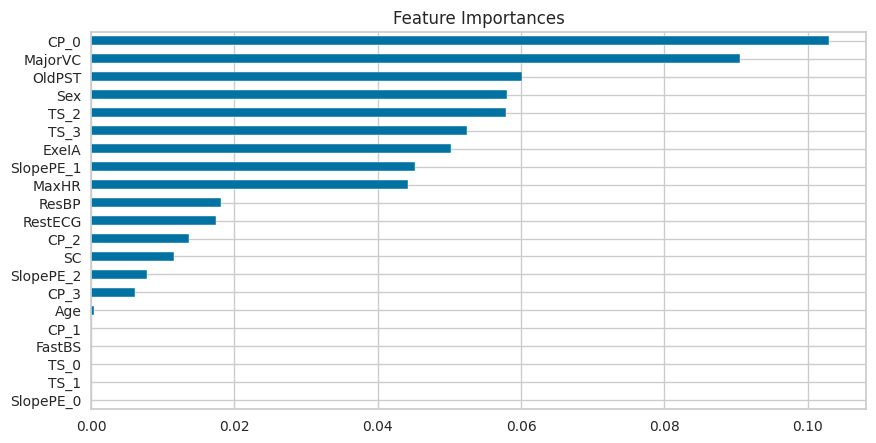

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Split the data into input features and output variable
X = df1.drop("L", axis=1)
y = df1["L"]

# Standardize the input features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit the Lasso model to the data
lasso = Lasso(alpha=0.01)
lasso.fit(X_std, y)

# Get the feature importance scores
feature_scores = pd.Series(index=X.columns, data=np.abs(lasso.coef_))

# Plot the feature importances
plt.figure(figsize=(10, 5))
feature_scores.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.show()


In [ ]:
# Sort the features by their score in descending order
sorted_features = feature_scores.sort_values(ascending=False)

# Print the sorted features and their scores
print("Feature importance score:")
print(sorted_features)

Feature importance score:
CP_0         0.103039
MajorVC      0.090608
OldPST       0.060185
Sex          0.058027
TS_2         0.057877
TS_3         0.052517
ExeIA        0.050199
SlopePE_1    0.045241
MaxHR        0.044215
ResBP        0.018077
RestECG      0.017469
CP_2         0.013585
SC           0.011522
SlopePE_2    0.007724
CP_3         0.006103
Age          0.000336
TS_0         0.000000
TS_1         0.000000
CP_1         0.000000
SlopePE_0    0.000000
FastBS       0.000000
dtype: float64


In [ ]:
df2=df1.copy()

In [ ]:
# --- Drop Unnecessary features ---
df2 = df1.drop(columns = ['FastBS', 'SlopePE_0', 'CP_1', 'TS_1', 'TS_0','Age','CP_3','SlopePE_2','SC','CP_2','RestECG'])
df2.head()

,Sex,ResBP,MaxHR,ExeIA,OldPST,MajorVC,L,CP_0,TS_2,TS_3,SlopePE_1
0,1,145,150,0,2.3,0,1,0,0,0,0
1,1,130,187,0,3.5,0,1,0,1,0,0
2,0,130,172,0,1.4,0,1,0,1,0,0
3,1,120,178,0,0.8,0,1,0,1,0,0
4,0,120,163,1,0.6,0,1,1,1,0,0


In [ ]:
# Split the data into input features and output variable
X = df2.drop("L", axis=1)
y = df2["L"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
# --- Applying Gradient Boosting ---
classifierGB = GradientBoostingClassifier()

classifierGB.fit(x_train, y_train)
GBy_pred = classifierGB.predict(x_test)
# Calculate accuracy
acGB = accuracy_score(y_test, GBy_pred)
precisionGB = precision_score(y_test, GBy_pred)
recallGB = recall_score(y_test, GBy_pred)
f1GB = f1_score(y_test, GBy_pred)
auc_rocGB = roc_auc_score(y_test, GBy_pred)

print("Accuracy of GB:", acGB)
print("Precision of GB:", precisionGB)
print("Recall of GB:", recallGB)
print("F1-score of GB:", f1GB)
print("AUC-ROC of GB:", auc_rocGB)

# Calculate MCC
mccGB = matthews_corrcoef(y_test, GBy_pred)
print("MCC of GB:", mccGB)

# Calculate prediction time
import time
start_time = time.time()

p_timeGB = time.time() - start_time
print("Prediction Time:", p_timeGB)

Accuracy of GB: 0.8688524590163934
Precision of GB: 0.9117647058823529
Recall of GB: 0.8611111111111112
F1-score of GB: 0.8857142857142858
AUC-ROC of GB: 0.8705555555555555
MCC of GB: 0.7338093457393797
Prediction Time: 3.504753112792969e-05


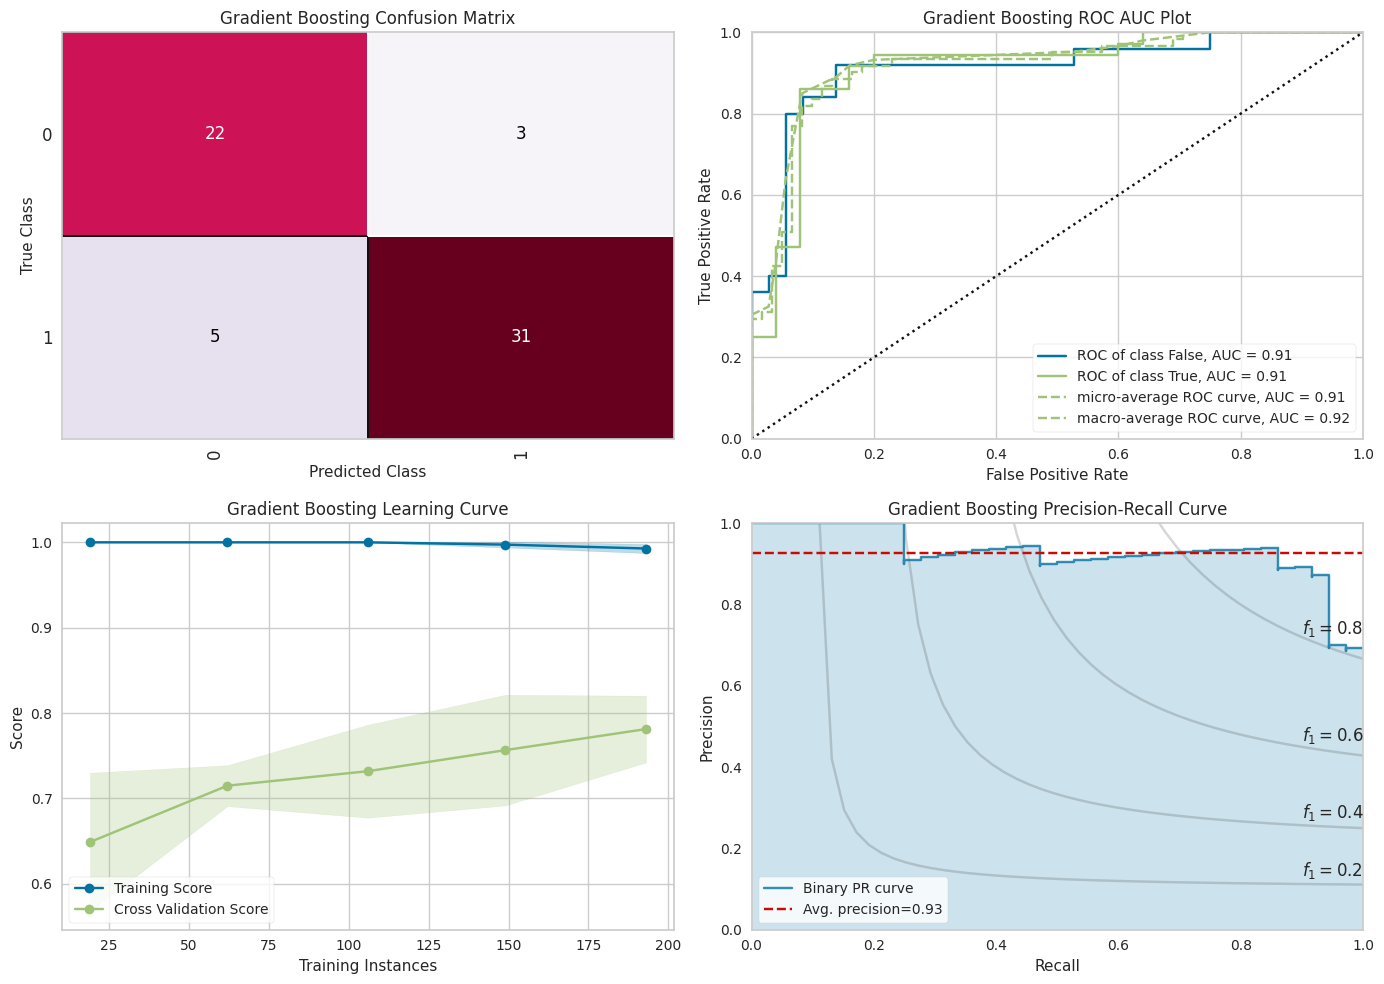

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(classifierGB, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(classifierGB, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(classifierGB, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(classifierGB, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 KB 4.5 MB/s eta 0:00:00


In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from functools import partial
from sklearn.model_selection import cross_val_score

In [ ]:
# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'random_state': hp.choice('random_state', range(100)),
    'loss': hp.choice('loss', ['deviance', 'exponential']),
}

# Define the objective function to minimize
def objective(params):
    params['n_estimators'] = round(params['n_estimators'])
    params['max_depth'] = round(params['max_depth'])
    params['min_samples_split'] = round(params['min_samples_split'])
    params['min_samples_leaf'] = round(params['min_samples_leaf'])
    clf = GradientBoostingClassifier(**params)
    score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    return -score

In [ ]:
# Run hyperparameter optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=100)

# Print the best hyperparameters
print(best)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

2023-03-02 10:39:00,326 - hyperopt.tpe - INFO - tpe_transform took 0.013150 seconds
2023-03-02 10:39:00,328 - hyperopt.tpe - INFO - TPE using 0 trials


  1%|          | 1/100 [00:01<01:49,  1.11s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:01,441 - hyperopt.tpe - INFO - tpe_transform took 0.015907 seconds
2023-03-02 10:39:01,443 - hyperopt.tpe - INFO - TPE using 1/1 trials with best loss -0.793793


  2%|▏         | 2/100 [00:04<04:04,  2.49s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:04,901 - hyperopt.tpe - INFO - tpe_transform took 0.018610 seconds
2023-03-02 10:39:04,902 - hyperopt.tpe - INFO - TPE using 2/2 trials with best loss -0.793793


  3%|▎         | 3/100 [00:07<04:13,  2.61s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:07,662 - hyperopt.tpe - INFO - tpe_transform took 0.019260 seconds
2023-03-02 10:39:07,664 - hyperopt.tpe - INFO - TPE using 3/3 trials with best loss -0.793793


  4%|▍         | 4/100 [00:11<05:08,  3.22s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:11,801 - hyperopt.tpe - INFO - tpe_transform took 0.015121 seconds
2023-03-02 10:39:11,804 - hyperopt.tpe - INFO - TPE using 4/4 trials with best loss -0.793793


  5%|▌         | 5/100 [00:13<04:14,  2.68s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:13,518 - hyperopt.tpe - INFO - tpe_transform took 0.015465 seconds
2023-03-02 10:39:13,519 - hyperopt.tpe - INFO - TPE using 5/5 trials with best loss -0.793793


  6%|▌         | 6/100 [00:14<03:40,  2.35s/it, best loss: -0.7937925170068028]

2023-03-02 10:39:15,235 - hyperopt.tpe - INFO - tpe_transform took 0.020235 seconds
2023-03-02 10:39:15,239 - hyperopt.tpe - INFO - TPE using 6/6 trials with best loss -0.793793


  7%|▋         | 7/100 [00:15<02:38,  1.71s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:15,620 - hyperopt.tpe - INFO - tpe_transform took 0.012097 seconds
2023-03-02 10:39:15,622 - hyperopt.tpe - INFO - TPE using 7/7 trials with best loss -0.810289


  8%|▊         | 8/100 [00:15<01:56,  1.27s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:15,944 - hyperopt.tpe - INFO - tpe_transform took 0.014497 seconds
2023-03-02 10:39:15,946 - hyperopt.tpe - INFO - TPE using 8/8 trials with best loss -0.810289


  9%|▉         | 9/100 [00:15<01:28,  1.03it/s, best loss: -0.8102891156462586]

2023-03-02 10:39:16,270 - hyperopt.tpe - INFO - tpe_transform took 0.014513 seconds
2023-03-02 10:39:16,272 - hyperopt.tpe - INFO - TPE using 9/9 trials with best loss -0.810289


 10%|█         | 10/100 [00:17<01:49,  1.21s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:18,030 - hyperopt.tpe - INFO - tpe_transform took 0.018180 seconds
2023-03-02 10:39:18,034 - hyperopt.tpe - INFO - TPE using 10/10 trials with best loss -0.810289


 11%|█         | 11/100 [00:18<01:29,  1.01s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:18,578 - hyperopt.tpe - INFO - tpe_transform took 0.020014 seconds
2023-03-02 10:39:18,581 - hyperopt.tpe - INFO - TPE using 11/11 trials with best loss -0.810289


 12%|█▏        | 12/100 [00:19<01:33,  1.06s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:19,758 - hyperopt.tpe - INFO - tpe_transform took 0.014631 seconds
2023-03-02 10:39:19,762 - hyperopt.tpe - INFO - TPE using 12/12 trials with best loss -0.810289


 13%|█▎        | 13/100 [00:21<01:52,  1.30s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:21,586 - hyperopt.tpe - INFO - tpe_transform took 0.014407 seconds
2023-03-02 10:39:21,587 - hyperopt.tpe - INFO - TPE using 13/13 trials with best loss -0.810289


 14%|█▍        | 14/100 [00:21<01:33,  1.09s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:22,199 - hyperopt.tpe - INFO - tpe_transform took 0.014079 seconds
2023-03-02 10:39:22,200 - hyperopt.tpe - INFO - TPE using 14/14 trials with best loss -0.810289


 15%|█▌        | 15/100 [00:22<01:31,  1.07s/it, best loss: -0.8102891156462586]

2023-03-02 10:39:23,235 - hyperopt.tpe - INFO - tpe_transform took 0.014793 seconds
2023-03-02 10:39:23,237 - hyperopt.tpe - INFO - TPE using 15/15 trials with best loss -0.810289


 16%|█▌        | 16/100 [00:24<01:36,  1.15s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:24,566 - hyperopt.tpe - INFO - tpe_transform took 0.014027 seconds
2023-03-02 10:39:24,567 - hyperopt.tpe - INFO - TPE using 16/16 trials with best loss -0.822619


 17%|█▋        | 17/100 [00:25<01:30,  1.09s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:25,506 - hyperopt.tpe - INFO - tpe_transform took 0.013171 seconds
2023-03-02 10:39:25,507 - hyperopt.tpe - INFO - TPE using 17/17 trials with best loss -0.822619


 18%|█▊        | 18/100 [00:27<01:50,  1.35s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:27,462 - hyperopt.tpe - INFO - tpe_transform took 0.014875 seconds
2023-03-02 10:39:27,463 - hyperopt.tpe - INFO - TPE using 18/18 trials with best loss -0.822619


 19%|█▉        | 19/100 [00:27<01:28,  1.09s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:27,955 - hyperopt.tpe - INFO - tpe_transform took 0.014317 seconds
2023-03-02 10:39:27,957 - hyperopt.tpe - INFO - TPE using 19/19 trials with best loss -0.822619


 20%|██        | 20/100 [00:28<01:23,  1.05s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:28,905 - hyperopt.tpe - INFO - tpe_transform took 0.014333 seconds
2023-03-02 10:39:28,907 - hyperopt.tpe - INFO - TPE using 20/20 trials with best loss -0.822619


 21%|██        | 21/100 [00:29<01:19,  1.01s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:29,829 - hyperopt.tpe - INFO - tpe_transform took 0.019392 seconds
2023-03-02 10:39:29,831 - hyperopt.tpe - INFO - TPE using 21/21 trials with best loss -0.822619


 22%|██▏       | 22/100 [00:30<01:20,  1.03s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:30,921 - hyperopt.tpe - INFO - tpe_transform took 0.019872 seconds
2023-03-02 10:39:30,923 - hyperopt.tpe - INFO - TPE using 22/22 trials with best loss -0.822619


 23%|██▎       | 23/100 [00:31<01:26,  1.12s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:32,253 - hyperopt.tpe - INFO - tpe_transform took 0.019064 seconds
2023-03-02 10:39:32,257 - hyperopt.tpe - INFO - TPE using 23/23 trials with best loss -0.822619


 24%|██▍       | 24/100 [00:32<01:18,  1.03s/it, best loss: -0.8226190476190476]

2023-03-02 10:39:33,053 - hyperopt.tpe - INFO - tpe_transform took 0.015465 seconds
2023-03-02 10:39:33,056 - hyperopt.tpe - INFO - TPE using 24/24 trials with best loss -0.822619


 25%|██▌       | 25/100 [00:34<01:22,  1.11s/it, best loss: -0.830952380952381] 

2023-03-02 10:39:34,339 - hyperopt.tpe - INFO - tpe_transform took 0.016363 seconds
2023-03-02 10:39:34,341 - hyperopt.tpe - INFO - TPE using 25/25 trials with best loss -0.830952


 26%|██▌       | 26/100 [00:35<01:24,  1.14s/it, best loss: -0.830952380952381]

2023-03-02 10:39:35,572 - hyperopt.tpe - INFO - tpe_transform took 0.014260 seconds
2023-03-02 10:39:35,573 - hyperopt.tpe - INFO - TPE using 26/26 trials with best loss -0.830952


 27%|██▋       | 27/100 [00:36<01:25,  1.17s/it, best loss: -0.830952380952381]

2023-03-02 10:39:36,793 - hyperopt.tpe - INFO - tpe_transform took 0.018170 seconds
2023-03-02 10:39:36,796 - hyperopt.tpe - INFO - TPE using 27/27 trials with best loss -0.830952


 28%|██▊       | 28/100 [00:37<01:31,  1.27s/it, best loss: -0.830952380952381]

2023-03-02 10:39:38,296 - hyperopt.tpe - INFO - tpe_transform took 0.013328 seconds
2023-03-02 10:39:38,297 - hyperopt.tpe - INFO - TPE using 28/28 trials with best loss -0.830952


 29%|██▉       | 29/100 [00:39<01:25,  1.20s/it, best loss: -0.830952380952381]

2023-03-02 10:39:39,330 - hyperopt.tpe - INFO - tpe_transform took 0.014834 seconds
2023-03-02 10:39:39,331 - hyperopt.tpe - INFO - TPE using 29/29 trials with best loss -0.830952


 30%|███       | 30/100 [00:40<01:24,  1.21s/it, best loss: -0.830952380952381]

2023-03-02 10:39:40,569 - hyperopt.tpe - INFO - tpe_transform took 0.012637 seconds
2023-03-02 10:39:40,570 - hyperopt.tpe - INFO - TPE using 30/30 trials with best loss -0.830952


 31%|███       | 31/100 [00:42<01:37,  1.41s/it, best loss: -0.830952380952381]

2023-03-02 10:39:42,451 - hyperopt.tpe - INFO - tpe_transform took 0.014745 seconds
2023-03-02 10:39:42,453 - hyperopt.tpe - INFO - TPE using 31/31 trials with best loss -0.830952


 32%|███▏      | 32/100 [00:43<01:31,  1.34s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:43,736 - hyperopt.tpe - INFO - tpe_transform took 0.126493 seconds
2023-03-02 10:39:43,740 - hyperopt.tpe - INFO - TPE using 32/32 trials with best loss -0.834864


 33%|███▎      | 33/100 [00:45<01:45,  1.57s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:45,722 - hyperopt.tpe - INFO - tpe_transform took 0.013688 seconds
2023-03-02 10:39:45,723 - hyperopt.tpe - INFO - TPE using 33/33 trials with best loss -0.834864


 34%|███▍      | 34/100 [00:46<01:42,  1.55s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:47,229 - hyperopt.tpe - INFO - tpe_transform took 0.014201 seconds
2023-03-02 10:39:47,230 - hyperopt.tpe - INFO - TPE using 34/34 trials with best loss -0.834864


 35%|███▌      | 35/100 [00:48<01:35,  1.46s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:48,489 - hyperopt.tpe - INFO - tpe_transform took 0.014100 seconds
2023-03-02 10:39:48,490 - hyperopt.tpe - INFO - TPE using 35/35 trials with best loss -0.834864


 36%|███▌      | 36/100 [00:49<01:25,  1.34s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:49,539 - hyperopt.tpe - INFO - tpe_transform took 0.014177 seconds
2023-03-02 10:39:49,541 - hyperopt.tpe - INFO - TPE using 36/36 trials with best loss -0.834864


 37%|███▋      | 37/100 [00:50<01:23,  1.33s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:50,858 - hyperopt.tpe - INFO - tpe_transform took 0.013062 seconds
2023-03-02 10:39:50,860 - hyperopt.tpe - INFO - TPE using 37/37 trials with best loss -0.834864


 38%|███▊      | 38/100 [00:51<01:23,  1.35s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:52,248 - hyperopt.tpe - INFO - tpe_transform took 0.014025 seconds
2023-03-02 10:39:52,250 - hyperopt.tpe - INFO - TPE using 38/38 trials with best loss -0.834864


 39%|███▉      | 39/100 [00:53<01:25,  1.40s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:53,770 - hyperopt.tpe - INFO - tpe_transform took 0.015127 seconds
2023-03-02 10:39:53,772 - hyperopt.tpe - INFO - TPE using 39/39 trials with best loss -0.834864


 40%|████      | 40/100 [00:54<01:11,  1.20s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:54,492 - hyperopt.tpe - INFO - tpe_transform took 0.016132 seconds
2023-03-02 10:39:54,495 - hyperopt.tpe - INFO - TPE using 40/40 trials with best loss -0.834864


 41%|████      | 41/100 [00:56<01:23,  1.42s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:56,425 - hyperopt.tpe - INFO - tpe_transform took 0.018690 seconds
2023-03-02 10:39:56,429 - hyperopt.tpe - INFO - TPE using 41/41 trials with best loss -0.834864


 42%|████▏     | 42/100 [00:58<01:43,  1.79s/it, best loss: -0.8348639455782314]

2023-03-02 10:39:59,085 - hyperopt.tpe - INFO - tpe_transform took 0.014075 seconds
2023-03-02 10:39:59,087 - hyperopt.tpe - INFO - TPE using 42/42 trials with best loss -0.834864


 43%|████▎     | 43/100 [00:59<01:31,  1.60s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:00,231 - hyperopt.tpe - INFO - tpe_transform took 0.013417 seconds
2023-03-02 10:40:00,233 - hyperopt.tpe - INFO - TPE using 43/43 trials with best loss -0.834864


 44%|████▍     | 44/100 [01:01<01:30,  1.62s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:01,916 - hyperopt.tpe - INFO - tpe_transform took 0.014359 seconds
2023-03-02 10:40:01,917 - hyperopt.tpe - INFO - TPE using 44/44 trials with best loss -0.834864


 45%|████▌     | 45/100 [01:02<01:12,  1.31s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:02,505 - hyperopt.tpe - INFO - tpe_transform took 0.015661 seconds
2023-03-02 10:40:02,506 - hyperopt.tpe - INFO - TPE using 45/45 trials with best loss -0.834864


 46%|████▌     | 46/100 [01:03<01:06,  1.23s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:03,554 - hyperopt.tpe - INFO - tpe_transform took 0.014751 seconds
2023-03-02 10:40:03,556 - hyperopt.tpe - INFO - TPE using 46/46 trials with best loss -0.834864


 47%|████▋     | 47/100 [01:03<00:51,  1.04it/s, best loss: -0.8348639455782314]

2023-03-02 10:40:03,882 - hyperopt.tpe - INFO - tpe_transform took 0.014438 seconds
2023-03-02 10:40:03,884 - hyperopt.tpe - INFO - TPE using 47/47 trials with best loss -0.834864


 48%|████▊     | 48/100 [01:04<00:56,  1.08s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:05,233 - hyperopt.tpe - INFO - tpe_transform took 0.015051 seconds
2023-03-02 10:40:05,234 - hyperopt.tpe - INFO - TPE using 48/48 trials with best loss -0.834864


 49%|████▉     | 49/100 [01:05<00:53,  1.04s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:06,187 - hyperopt.tpe - INFO - tpe_transform took 0.012174 seconds
2023-03-02 10:40:06,188 - hyperopt.tpe - INFO - TPE using 49/49 trials with best loss -0.834864


 50%|█████     | 50/100 [01:07<01:03,  1.26s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:07,965 - hyperopt.tpe - INFO - tpe_transform took 0.015009 seconds
2023-03-02 10:40:07,967 - hyperopt.tpe - INFO - TPE using 50/50 trials with best loss -0.834864


 51%|█████     | 51/100 [01:08<01:03,  1.29s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:09,321 - hyperopt.tpe - INFO - tpe_transform took 0.019541 seconds
2023-03-02 10:40:09,323 - hyperopt.tpe - INFO - TPE using 51/51 trials with best loss -0.834864


 52%|█████▏    | 52/100 [01:11<01:14,  1.55s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:11,484 - hyperopt.tpe - INFO - tpe_transform took 0.026121 seconds
2023-03-02 10:40:11,486 - hyperopt.tpe - INFO - TPE using 52/52 trials with best loss -0.834864


 53%|█████▎    | 53/100 [01:12<01:08,  1.46s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:12,734 - hyperopt.tpe - INFO - tpe_transform took 0.014375 seconds
2023-03-02 10:40:12,736 - hyperopt.tpe - INFO - TPE using 53/53 trials with best loss -0.834864


 54%|█████▍    | 54/100 [01:13<01:00,  1.31s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:13,682 - hyperopt.tpe - INFO - tpe_transform took 0.014620 seconds
2023-03-02 10:40:13,684 - hyperopt.tpe - INFO - TPE using 54/54 trials with best loss -0.834864


 55%|█████▌    | 55/100 [01:14<00:51,  1.15s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:14,453 - hyperopt.tpe - INFO - tpe_transform took 0.014685 seconds
2023-03-02 10:40:14,457 - hyperopt.tpe - INFO - TPE using 55/55 trials with best loss -0.834864


 56%|█████▌    | 56/100 [01:14<00:45,  1.04s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:15,240 - hyperopt.tpe - INFO - tpe_transform took 0.014002 seconds
2023-03-02 10:40:15,241 - hyperopt.tpe - INFO - TPE using 56/56 trials with best loss -0.834864


 57%|█████▋    | 57/100 [01:16<00:46,  1.09s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:16,435 - hyperopt.tpe - INFO - tpe_transform took 0.013255 seconds
2023-03-02 10:40:16,441 - hyperopt.tpe - INFO - TPE using 57/57 trials with best loss -0.834864


 58%|█████▊    | 58/100 [01:16<00:40,  1.04it/s, best loss: -0.8348639455782314]

2023-03-02 10:40:17,096 - hyperopt.tpe - INFO - tpe_transform took 0.015536 seconds
2023-03-02 10:40:17,099 - hyperopt.tpe - INFO - TPE using 58/58 trials with best loss -0.834864


 59%|█████▉    | 59/100 [01:17<00:31,  1.31it/s, best loss: -0.8348639455782314]

2023-03-02 10:40:17,402 - hyperopt.tpe - INFO - tpe_transform took 0.012871 seconds
2023-03-02 10:40:17,403 - hyperopt.tpe - INFO - TPE using 59/59 trials with best loss -0.834864


 60%|██████    | 60/100 [01:20<00:58,  1.47s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:20,525 - hyperopt.tpe - INFO - tpe_transform took 0.015654 seconds
2023-03-02 10:40:20,527 - hyperopt.tpe - INFO - TPE using 60/60 trials with best loss -0.834864


 61%|██████    | 61/100 [01:22<01:09,  1.77s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:23,012 - hyperopt.tpe - INFO - tpe_transform took 0.020227 seconds
2023-03-02 10:40:23,014 - hyperopt.tpe - INFO - TPE using 61/61 trials with best loss -0.834864


 62%|██████▏   | 62/100 [01:23<00:55,  1.45s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:23,721 - hyperopt.tpe - INFO - tpe_transform took 0.018718 seconds
2023-03-02 10:40:23,724 - hyperopt.tpe - INFO - TPE using 62/62 trials with best loss -0.834864


 63%|██████▎   | 63/100 [01:24<00:54,  1.49s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:25,273 - hyperopt.tpe - INFO - tpe_transform took 0.014811 seconds
2023-03-02 10:40:25,276 - hyperopt.tpe - INFO - TPE using 63/63 trials with best loss -0.834864


 64%|██████▍   | 64/100 [01:25<00:47,  1.32s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:26,199 - hyperopt.tpe - INFO - tpe_transform took 0.015547 seconds
2023-03-02 10:40:26,201 - hyperopt.tpe - INFO - TPE using 64/64 trials with best loss -0.834864


 65%|██████▌   | 65/100 [01:27<00:47,  1.36s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:27,669 - hyperopt.tpe - INFO - tpe_transform took 0.015231 seconds
2023-03-02 10:40:27,671 - hyperopt.tpe - INFO - TPE using 65/65 trials with best loss -0.834864


 66%|██████▌   | 66/100 [01:28<00:45,  1.33s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:28,925 - hyperopt.tpe - INFO - tpe_transform took 0.014192 seconds
2023-03-02 10:40:28,927 - hyperopt.tpe - INFO - TPE using 66/66 trials with best loss -0.834864


 67%|██████▋   | 67/100 [01:29<00:42,  1.30s/it, best loss: -0.8348639455782314]

2023-03-02 10:40:30,165 - hyperopt.tpe - INFO - tpe_transform took 0.017259 seconds
2023-03-02 10:40:30,170 - hyperopt.tpe - INFO - TPE using 67/67 trials with best loss -0.834864


 68%|██████▊   | 68/100 [01:31<00:42,  1.32s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:31,524 - hyperopt.tpe - INFO - tpe_transform took 0.015425 seconds
2023-03-02 10:40:31,527 - hyperopt.tpe - INFO - TPE using 68/68 trials with best loss -0.835119


 69%|██████▉   | 69/100 [01:32<00:41,  1.33s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:32,887 - hyperopt.tpe - INFO - tpe_transform took 0.015259 seconds
2023-03-02 10:40:32,889 - hyperopt.tpe - INFO - TPE using 69/69 trials with best loss -0.835119


 70%|███████   | 70/100 [01:34<00:41,  1.38s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:34,371 - hyperopt.tpe - INFO - tpe_transform took 0.016218 seconds
2023-03-02 10:40:34,373 - hyperopt.tpe - INFO - TPE using 70/70 trials with best loss -0.835119


 71%|███████   | 71/100 [01:35<00:38,  1.32s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:35,563 - hyperopt.tpe - INFO - tpe_transform took 0.025183 seconds
2023-03-02 10:40:35,569 - hyperopt.tpe - INFO - TPE using 71/71 trials with best loss -0.835119


 72%|███████▏  | 72/100 [01:36<00:40,  1.46s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:37,334 - hyperopt.tpe - INFO - tpe_transform took 0.019013 seconds
2023-03-02 10:40:37,339 - hyperopt.tpe - INFO - TPE using 72/72 trials with best loss -0.835119


 73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:38,396 - hyperopt.tpe - INFO - tpe_transform took 0.015454 seconds
2023-03-02 10:40:38,398 - hyperopt.tpe - INFO - TPE using 73/73 trials with best loss -0.835119


 74%|███████▍  | 74/100 [01:39<00:38,  1.47s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:40,159 - hyperopt.tpe - INFO - tpe_transform took 0.014899 seconds
2023-03-02 10:40:40,160 - hyperopt.tpe - INFO - TPE using 74/74 trials with best loss -0.835119


 75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:41,220 - hyperopt.tpe - INFO - tpe_transform took 0.013779 seconds
2023-03-02 10:40:41,221 - hyperopt.tpe - INFO - TPE using 75/75 trials with best loss -0.835119


 76%|███████▌  | 76/100 [01:42<00:30,  1.28s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:42,343 - hyperopt.tpe - INFO - tpe_transform took 0.015913 seconds
2023-03-02 10:40:42,347 - hyperopt.tpe - INFO - TPE using 76/76 trials with best loss -0.835119


 77%|███████▋  | 77/100 [01:43<00:31,  1.36s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:43,895 - hyperopt.tpe - INFO - tpe_transform took 0.014272 seconds
2023-03-02 10:40:43,897 - hyperopt.tpe - INFO - TPE using 77/77 trials with best loss -0.835119


 78%|███████▊  | 78/100 [01:45<00:30,  1.39s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:45,342 - hyperopt.tpe - INFO - tpe_transform took 0.014329 seconds
2023-03-02 10:40:45,343 - hyperopt.tpe - INFO - TPE using 78/78 trials with best loss -0.835119


 79%|███████▉  | 79/100 [01:46<00:30,  1.44s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:46,912 - hyperopt.tpe - INFO - tpe_transform took 0.014385 seconds
2023-03-02 10:40:46,916 - hyperopt.tpe - INFO - TPE using 79/79 trials with best loss -0.835119


 80%|████████  | 80/100 [01:47<00:26,  1.31s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:47,930 - hyperopt.tpe - INFO - tpe_transform took 0.015711 seconds
2023-03-02 10:40:47,933 - hyperopt.tpe - INFO - TPE using 80/80 trials with best loss -0.835119


 81%|████████  | 81/100 [01:48<00:24,  1.30s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:49,207 - hyperopt.tpe - INFO - tpe_transform took 0.019467 seconds
2023-03-02 10:40:49,213 - hyperopt.tpe - INFO - TPE using 81/81 trials with best loss -0.835119


 82%|████████▏ | 82/100 [01:50<00:25,  1.43s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:50,937 - hyperopt.tpe - INFO - tpe_transform took 0.018894 seconds
2023-03-02 10:40:50,942 - hyperopt.tpe - INFO - TPE using 82/82 trials with best loss -0.835119


 83%|████████▎ | 83/100 [01:52<00:25,  1.50s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:52,605 - hyperopt.tpe - INFO - tpe_transform took 0.014061 seconds
2023-03-02 10:40:52,606 - hyperopt.tpe - INFO - TPE using 83/83 trials with best loss -0.835119


 84%|████████▍ | 84/100 [01:53<00:21,  1.33s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:53,543 - hyperopt.tpe - INFO - tpe_transform took 0.015110 seconds
2023-03-02 10:40:53,545 - hyperopt.tpe - INFO - TPE using 84/84 trials with best loss -0.835119


 85%|████████▌ | 85/100 [01:55<00:23,  1.54s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:55,651 - hyperopt.tpe - INFO - tpe_transform took 0.101898 seconds
2023-03-02 10:40:55,653 - hyperopt.tpe - INFO - TPE using 85/85 trials with best loss -0.835119


 86%|████████▌ | 86/100 [01:56<00:19,  1.39s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:56,589 - hyperopt.tpe - INFO - tpe_transform took 0.014156 seconds
2023-03-02 10:40:56,591 - hyperopt.tpe - INFO - TPE using 86/86 trials with best loss -0.835119


 87%|████████▋ | 87/100 [01:57<00:17,  1.38s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:57,953 - hyperopt.tpe - INFO - tpe_transform took 0.015975 seconds
2023-03-02 10:40:57,957 - hyperopt.tpe - INFO - TPE using 87/87 trials with best loss -0.835119


 88%|████████▊ | 88/100 [01:58<00:15,  1.27s/it, best loss: -0.8351190476190476]

2023-03-02 10:40:58,966 - hyperopt.tpe - INFO - tpe_transform took 0.014867 seconds
2023-03-02 10:40:58,968 - hyperopt.tpe - INFO - TPE using 88/88 trials with best loss -0.835119


 89%|████████▉ | 89/100 [02:00<00:15,  1.37s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:00,587 - hyperopt.tpe - INFO - tpe_transform took 0.014024 seconds
2023-03-02 10:41:00,592 - hyperopt.tpe - INFO - TPE using 89/89 trials with best loss -0.835119


 90%|█████████ | 90/100 [02:02<00:15,  1.52s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:02,460 - hyperopt.tpe - INFO - tpe_transform took 0.017985 seconds
2023-03-02 10:41:02,465 - hyperopt.tpe - INFO - TPE using 90/90 trials with best loss -0.835119


 91%|█████████ | 91/100 [02:03<00:14,  1.61s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:04,273 - hyperopt.tpe - INFO - tpe_transform took 0.013135 seconds
2023-03-02 10:41:04,274 - hyperopt.tpe - INFO - TPE using 91/91 trials with best loss -0.835119


 92%|█████████▏| 92/100 [02:05<00:13,  1.63s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:05,941 - hyperopt.tpe - INFO - tpe_transform took 0.015790 seconds
2023-03-02 10:41:05,943 - hyperopt.tpe - INFO - TPE using 92/92 trials with best loss -0.835119


 93%|█████████▎| 93/100 [02:06<00:10,  1.45s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:06,988 - hyperopt.tpe - INFO - tpe_transform took 0.014215 seconds
2023-03-02 10:41:06,990 - hyperopt.tpe - INFO - TPE using 93/93 trials with best loss -0.835119


 94%|█████████▍| 94/100 [02:08<00:09,  1.51s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:08,621 - hyperopt.tpe - INFO - tpe_transform took 0.014720 seconds
2023-03-02 10:41:08,623 - hyperopt.tpe - INFO - TPE using 94/94 trials with best loss -0.835119


 95%|█████████▌| 95/100 [02:08<00:06,  1.27s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:09,323 - hyperopt.tpe - INFO - tpe_transform took 0.013875 seconds
2023-03-02 10:41:09,327 - hyperopt.tpe - INFO - TPE using 95/95 trials with best loss -0.835119


 96%|█████████▌| 96/100 [02:10<00:05,  1.48s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:11,306 - hyperopt.tpe - INFO - tpe_transform took 0.015012 seconds
2023-03-02 10:41:11,308 - hyperopt.tpe - INFO - TPE using 96/96 trials with best loss -0.835119


 97%|█████████▋| 97/100 [02:13<00:05,  1.80s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:13,856 - hyperopt.tpe - INFO - tpe_transform took 0.015616 seconds
2023-03-02 10:41:13,858 - hyperopt.tpe - INFO - TPE using 97/97 trials with best loss -0.835119


 98%|█████████▊| 98/100 [02:15<00:03,  1.99s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:16,282 - hyperopt.tpe - INFO - tpe_transform took 0.019847 seconds
2023-03-02 10:41:16,284 - hyperopt.tpe - INFO - TPE using 98/98 trials with best loss -0.835119


 99%|█████████▉| 99/100 [02:17<00:01,  1.77s/it, best loss: -0.8351190476190476]

2023-03-02 10:41:17,534 - hyperopt.tpe - INFO - tpe_transform took 0.012951 seconds
2023-03-02 10:41:17,536 - hyperopt.tpe - INFO - TPE using 99/99 trials with best loss -0.835119


100%|██████████| 100/100 [02:18<00:00,  1.38s/it, best loss: -0.8351190476190476]
{'learning_rate': 0.009853186317850256, 'loss': 0, 'max_depth': 3.0, 'max_features': 0, 'min_samples_leaf': 9.0, 'min_samples_split': 7.0, 'n_estimators': 450.0, 'random_state': 96, 'subsample': 0.9402656924845748}


In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier( n_estimators=100,learning_rate=0.02508957, max_depth=6, loss='exponential',
                                          min_samples_leaf=20, max_leaf_nodes=9, min_samples_split=6, random_state=9, subsample= 0.60597313, max_features='sqrt')

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# Calculate accuracy
ac_GB = accuracy_score(y_test, y_pred_GB)
precision_GB = precision_score(y_test, y_pred_GB)
recall_GB = recall_score(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)
auc_roc_GB = roc_auc_score(y_test, y_pred_GB)

print("Accuracy of GB:", ac_GB)
print("Precision of GB:", precision_GB)
print("Recall of GB:", recall_GB)
print("F1-score of GB:", f1_GB)
print("AUC-ROC of GB:", auc_roc_GB)

# Calculate MCC
mcc_GB = matthews_corrcoef(y_test, y_pred_GB)
print("MCC of GB:", mcc_GB)

# Calculate prediction time
import time
start_time = time.time()

p_time = time.time() - start_time
print("Prediction Time:", p_time)

Accuracy of GB: 0.9508196721311475
Precision of GB: 0.9459459459459459
Recall of GB: 0.9722222222222222
F1-score of GB: 0.9589041095890412
AUC-ROC of GB: 0.9461111111111111
MCC of GB: 0.8982305205614358
Prediction Time: 6.461143493652344e-05


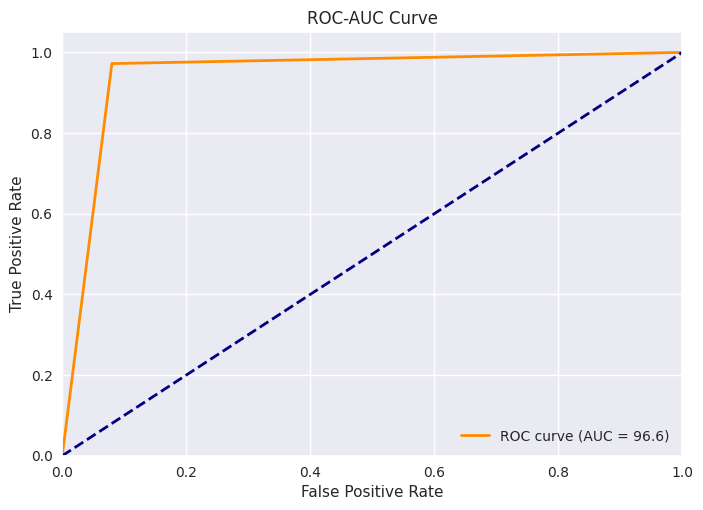

In [ ]:

from sklearn.metrics import roc_curve, auc
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_GB)

# Compute AUC-ROC
auc_roc_GB = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = 96.6)' % auc_roc_GB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()
